In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/card_transdata.csv


# credit card fraud detection by machine learning and deep learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# data preprocessing

In [4]:
df.shape

(1000000, 8)

In [5]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

<AxesSubplot:ylabel='fraud'>

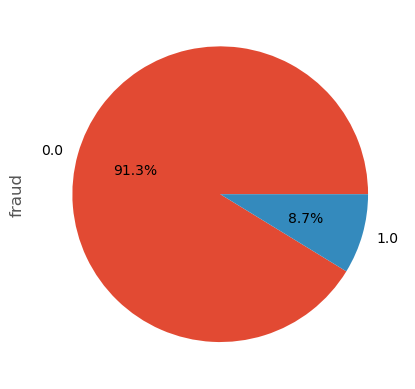

In [10]:
df['fraud'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# machine learning

# splitting the data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report

In [12]:
X=df.drop('fraud',axis=1)
y=df['fraud']

# data scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0, 1))
X_scaled=sc.fit_transform(X)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=42,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750000, 7)
(750000,)
(250000, 7)
(250000,)


In [15]:
X_train

array([[7.28079781e-04, 4.53388007e-05, 1.33018535e-03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.19947538e-04, 8.84085660e-06, 1.52295948e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.79480851e-04, 4.46473118e-05, 2.67579073e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.84926177e-04, 2.44267989e-05, 7.46991717e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.25527706e-04, 3.87494546e-03, 6.82173136e-03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.79683914e-03, 3.71034060e-05, 6.06392128e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

# random forest model

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228154
         1.0       1.00      1.00      1.00     21846

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



(-0.5, 1.5, 1.5, -0.5)

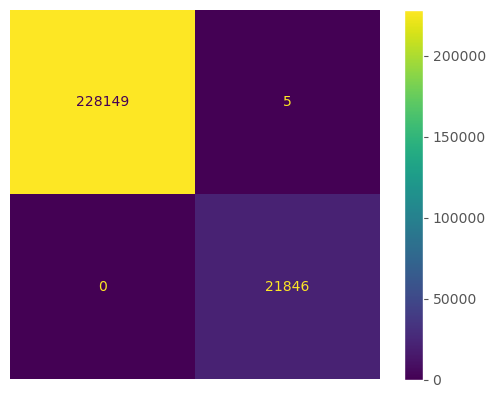

In [17]:
y_pred=model.predict(X_test)
disp=ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test))
disp=disp.plot()
print(classification_report(y_pred,y_test))
plt.axis('off')

# deep learning

In [18]:
import tensorflow
import keras

# ANN model

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [20]:
model_dl=Sequential()
model_dl.add(Dense(50,input_dim=X_train.shape[1],activation='relu'))
model_dl.add(Dropout(.2))
model_dl.add(Dense(50,activation='relu'))
model_dl.add(Dropout(.2))
model_dl.add(Dense(50,activation='relu'))
model_dl.add(Dropout(.2))
model_dl.add(Dense(1,activation='sigmoid'))
model_dl.compile(loss='binary_crossentropy',optimizer='adam')
model_dl.fit(X_train,y_train,epochs=10,batch_size=8)

Epoch 1/10
93750/93750 [==============================] - 255s 3ms/step - loss: 0.0736
Epoch 2/10
93750/93750 [==============================] - 250s 3ms/step - loss: 0.0460
Epoch 3/10
93750/93750 [==============================] - 248s 3ms/step - loss: 0.0410
Epoch 4/10
93750/93750 [==============================] - 248s 3ms/step - loss: 0.0389
Epoch 5/10
93750/93750 [==============================] - 248s 3ms/step - loss: 0.0371
Epoch 6/10
93750/93750 [==============================] - 248s 3ms/step - loss: 0.0352
Epoch 7/10
93750/93750 [==============================] - 246s 3ms/step - loss: 0.0346
Epoch 8/10
93750/93750 [==============================] - 247s 3ms/step - loss: 0.0339
Epoch 9/10
93750/93750 [==============================] - 248s 3ms/step - loss: 0.0336
Epoch 10/10
93750/93750 [==============================] - 248s 3ms/step - loss: 0.0341


In [22]:
model_dl.evaluate(X_test,y_test)

7813/7813 [==============================] - 16s 2ms/step - loss: 0.0267


0.02672058902680874

In [23]:
y_pred=model_dl.predict(X_test)
y_pred=np.round(y_pred)

7813/7813 [==============================] - 12s 1ms/step


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    229078
         1.0       0.93      0.97      0.95     20922

    accuracy                           0.99    250000
   macro avg       0.96      0.98      0.97    250000
weighted avg       0.99      0.99      0.99    250000



(-0.5, 1.5, 1.5, -0.5)

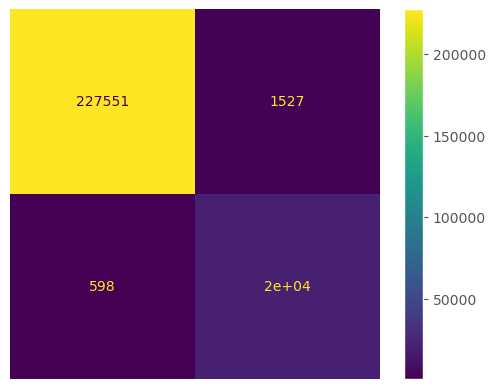

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test))
disp=disp.plot()
print(classification_report(y_pred,y_test))
plt.axis('off')